# Nigg and Herzog model
### Introduction to modeling and simulation of human movement

Desiree Miraldo  
Renato Naville Watanabe  
Marcos Duarte

https://github.com/BMClab/bmc/blob/master/courses/ModSim2018.md

* In class:

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math
from MuscleNigg import  MuscleNigg

%matplotlib notebook

### Muscle properties

In [20]:
Lslack = .223
Lce_o = .086 #optmal length
Fmax = 10000



### Initial conditions

In [21]:
LceNorm = .087/Lce_o
Lm = .31
Act = 0
t0 = 0
tf = 7.99
h = 1e-3

In [22]:
t = np.arange(t0,tf,h)
F = np.zeros(t.shape)
Fkpe = np.zeros(t.shape)
fiberLength = np.empty(t.shape)
tendonLength = np.empty(t.shape)
activation = np.zeros(t.shape)

fiberLength[0] = LceNorm * Lce_o
tendonLength[0] = Lm - fiberLength[0]

In [23]:
vastusMedial = MuscleNigg(Fmax=Fmax, Lce_o=Lce_o, Lslack=Lslack, dt= h)

In [24]:
vastusMedial.LceNorm = LceNorm

## Simulation - Parallel

In [25]:
for i in range (1,len(t)):
    #ramp
    if t[i]<=1:
        Lm = 0.31
    elif t[i]>1 and t[i]<2:
        Lm = .31 - .04*(t[i]-1)
        #print(Lm)
    # activation     
    if t[i]<=1 and np.random.rand(1)< 1:
        n = 1 
    elif t[i]>1.5 and t[i]<2.5 and np.random.rand(1)< 1:
        n = 1
    elif t[i]>=2.5 and np.random.rand(1)< 1:
        n = 1
    else:
        n = 0 
        
    ########################################################
    vastusMedial.updateMuscle(Lm, n)
    #########################################################################
    F[i] = vastusMedial.FTendonNorm * vastusMedial.Fmax
    Fkpe[i] = vastusMedial.FkpeNorm * vastusMedial.Fmax
    fiberLength[i] = vastusMedial.LceNorm * vastusMedial.Lce_o
    tendonLength[i] = vastusMedial.LseeNorm * vastusMedial.Lce_o
    activation[i] = vastusMedial.act

## Plot 

<IPython.core.display.Javascript object>


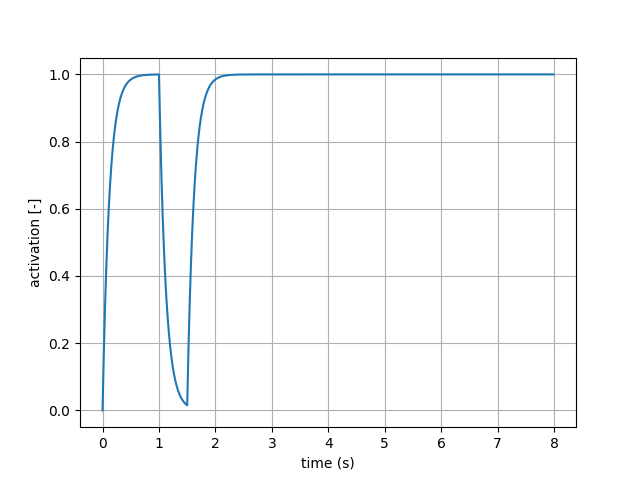

In [26]:
plt.figure()

plt.plot(t,activation)
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('activation [-]')
plt.show()

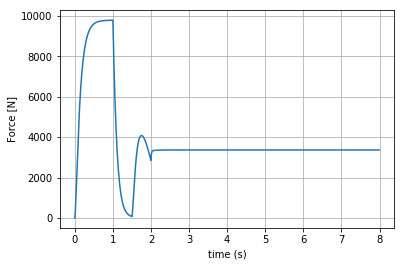

In [9]:

plt.figure()

plt.plot(t,F)

plt.grid()
plt.xlabel('time (s)')
plt.ylabel('Force [N]')
plt.show()

#ax.legend()

<IPython.core.display.Javascript object>


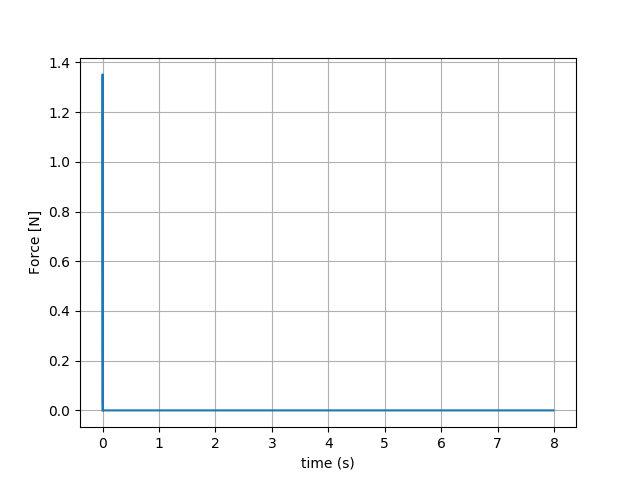

In [27]:

plt.figure()

plt.plot(t,Fkpe)

plt.grid()
plt.xlabel('time (s)')
plt.ylabel('Force [N]')
plt.show()


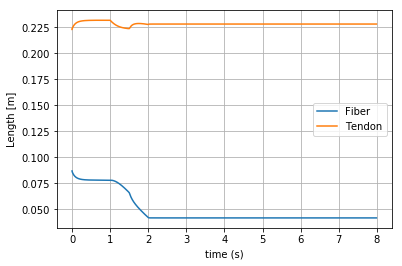

In [11]:
plt.figure()
plt.plot(t,fiberLength, label = 'Fiber')
plt.plot(t, tendonLength, label = 'Tendon')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('time (s)')
plt.ylabel('Length [m]');
plt.show()


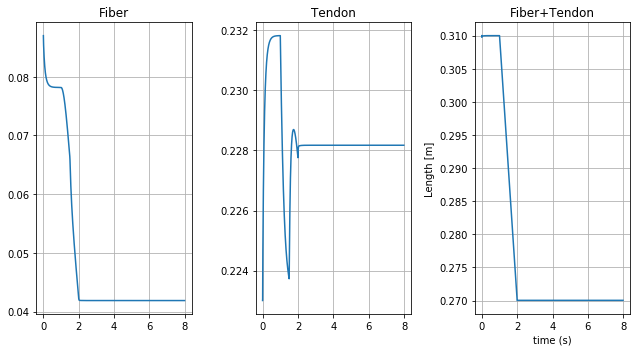

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(9, 5), sharex=True)

ax[0].plot(t, fiberLength, label = 'Fiber')
ax[0].set_title('Fiber')
ax[0].grid()
ax[1].plot(t, tendonLength, label = 'Tendon')
ax[1].set_title('Tendon')
ax[1].grid()
ax[2].plot(t, fiberLength+tendonLength, label = 'Fiber+Tendon')
ax[2].set_title('Fiber+Tendon')
ax[2].grid()
plt.xlabel('time (s)')
plt.ylabel('Length [m]')
plt.tight_layout()

<IPython.core.display.Javascript object>


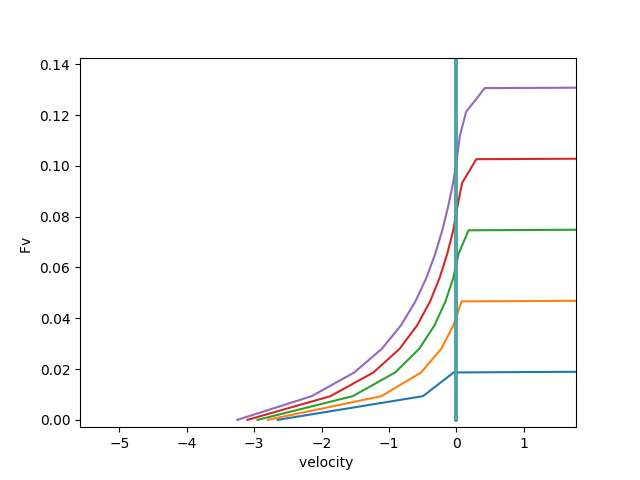

In [28]:
actNumber = 50
Force = np.zeros((150, actNumber))
v = np.zeros((150, actNumber))
activation = np.zeros((150, actNumber))

for j in range(5):
    vastusMedial.act = 1/actNumber*(j+1)
    Fvec = np.linspace(0, 1.39, 150)
    Force[:,j] = Fvec
    for i in range(len(Fvec)):
        vastusMedial.FCENorm = Fvec[i]
        vastusMedial.FLNorm = 1        
        vastusMedial.computeContractileElementDerivative()
        v[i,j] = vastusMedial.LceNormdot
        activation[i,j] = vastusMedial.act

plt.figure()
plt.plot(v, Fvec)
plt.xlabel('velocity ')
plt.ylabel('Fv ')
plt.show()

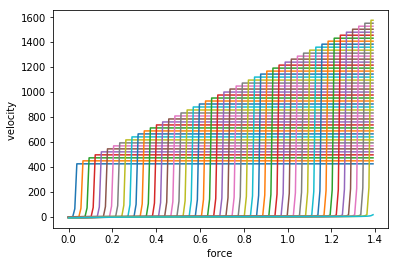

In [14]:
plt.figure()
plt.plot(Force, v)
plt.xlabel('force ')
plt.ylabel('velocity ')
plt.show()

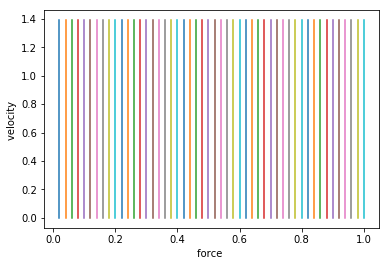

In [15]:
plt.figure()
plt.plot(activation, Force)
plt.xlabel('force ')
plt.ylabel('velocity ')
plt.show()

In [16]:
1.4*0.2

0.27999999999999997

In [17]:
v

array([[-2.65000000e+00, -2.80000000e+00, -2.95000000e+00, ...,
        -9.70000000e+00, -9.85000000e+00, -1.00000000e+01],
       [-4.93384075e-01, -1.11076389e+00, -1.53603448e+00, ...,
        -9.24633244e+00, -9.39837380e+00, -9.55033644e+00],
       [-3.75886525e-02, -5.21311475e-01, -9.05882353e-01, ...,
        -8.82538921e+00, -8.97870689e+00, -9.13190107e+00],
       ...,
       [ 4.23894000e+02,  4.47888000e+02,  4.71882000e+02, ...,
         1.55161200e+03,  2.34430000e+02,  5.18313817e+00],
       [ 4.23894000e+02,  4.47888000e+02,  4.71882000e+02, ...,
         1.55161200e+03,  1.57560600e+03,  7.87777778e+00],
       [ 4.23894000e+02,  4.47888000e+02,  4.71882000e+02, ...,
         1.55161200e+03,  1.57560600e+03,  1.56000000e+01]])

In [18]:
Force[-1,:]

array([1.39, 1.39, 1.39, 1.39, 1.39, 1.39, 1.39, 1.39, 1.39, 1.39, 1.39,
       1.39, 1.39, 1.39, 1.39, 1.39, 1.39, 1.39, 1.39, 1.39, 1.39, 1.39,
       1.39, 1.39, 1.39, 1.39, 1.39, 1.39, 1.39, 1.39, 1.39, 1.39, 1.39,
       1.39, 1.39, 1.39, 1.39, 1.39, 1.39, 1.39, 1.39, 1.39, 1.39, 1.39,
       1.39, 1.39, 1.39, 1.39, 1.39, 1.39])